#DataSet
This is a Dataset taken from Kaggle and modified few features
accordingly
- **DataSet Link**: https://github.com/Aishwarya2501/Statistical-Data-Analysis/blob/main/googleplay.csv



#Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


#Reading DataSet

In [77]:
data = pd.read_csv("googleplay.csv")

In [6]:
#gives all information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6041 non-null   object 
 1   Category        5920 non-null   object 
 2   Rating          4516 non-null   float64
 3   Reviews         5846 non-null   float64
 4   Size            5795 non-null   object 
 5   Installs        5836 non-null   object 
 6   Type            5859 non-null   object 
 7   Price           5996 non-null   object 
 8   Content Rating  5876 non-null   object 
 9   Genres          5791 non-null   object 
 10  Last Updated    5812 non-null   object 
 11  Current Ver     5976 non-null   object 
 12  Android Ver     5806 non-null   object 
dtypes: float64(2), object(11)
memory usage: 613.7+ KB


In [7]:
#Describing all the statistics in our data
data.describe()

,Rating,Reviews
count,4516.000000,5.846000e+03
mean,4.200753,4.373150e+05
std,0.545834,3.101221e+06
min,1.000000,0.000000e+00
25%,4.000000,8.000000e+00
50%,4.300000,3.100000e+02
75%,4.500000,2.850400e+04
max,5.000000,7.815831e+07


In [8]:
#shows the top 5 columns of the data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,NaN,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [9]:
#The total number of row entities or samples
len(data)

6041

In [10]:
#The total number of columns or features
cols=data.columns
cols

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
#To find numeric columns in our dataset
data_num = data._get_numeric_data()
list(data_num)

['Rating', 'Reviews']

In [12]:
#To find categorical columns in our dataset
data_categorical=set(cols)-set(data_num)
list(data_categorical)

['Installs',
 'App',
 'Content Rating',
 'Size',
 'Last Updated',
 'Android Ver',
 'Type',
 'Category',
 'Current Ver',
 'Genres',
 'Price']

#Data Cleaning

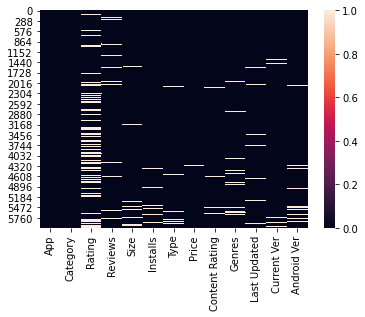

In [13]:
#finding missing values in dataset
sns.heatmap(data.isna())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


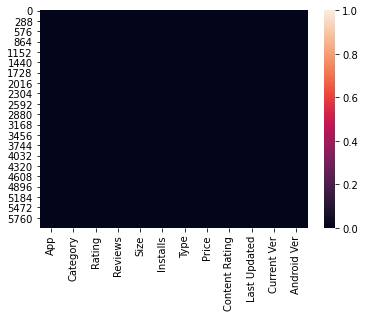

In [14]:
#Data Cleaning and filling all missing values
category=data['Category']
genres=data['Genres']
data.drop(["Genres"],axis=1,inplace=True)
data['Rating']=data['Rating'].fillna( method ='ffill', inplace = False)
data['Reviews']=data['Reviews'].fillna(data['Reviews'].mean())
data['Size']=data['Size'].fillna(data['Size'].mode)
data['Installs']=data['Installs'].fillna(data['Installs'].mode)
data['Price']=data['Price'].fillna(data['Price'].mode)
data['Content Rating']=data['Content Rating'].fillna(method ='ffill', inplace = False)
data['Last Updated']=data['Last Updated'].fillna(data['Last Updated'].mode)
data['Current Ver']=data['Current Ver'].fillna(data['Current Ver'].mode)
data['Android Ver']=data['Android Ver'].fillna(data['Android Ver'].mode)
i=0
for i in range(0,6040):
  if data['Price'][i]=="0":
   data['Type'][i]="Free" 
  else:
   data['Type'][i]="Paid"

sns.heatmap(data.isna())
plt.show()


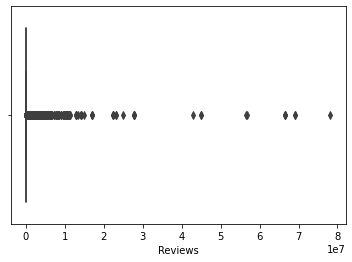

In [15]:
#To check for inconsistencies:
sns.boxplot(x=data['Reviews'])

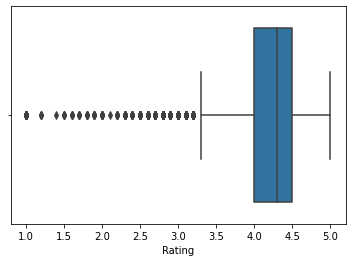

In [16]:
sns.boxplot(x=data['Rating'])
plt.show()
#No outliers

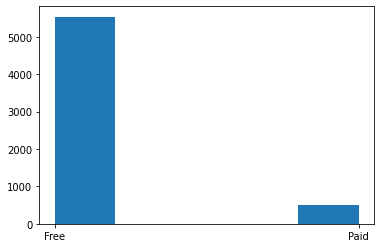

In [17]:
y=[]
for i in range(0,6040):
 y.append(data['Type'][i])

plt.hist(y,bins=5)
plt.show()

In [18]:
#Test for capitalization
data.pivot_table(index=["Category"], aggfunc='size')

Category
ART_AND_DESIGN           23
AUTO_AND_VEHICLES        28
BEAUTY                   38
BOOKS_AND_REFERENCE     142
BUSINESS                315
COMICS                   46
COMMUNICATION           213
DATING                  157
EDUCATION                95
ENTERTAINMENT            80
EVENTS                   59
FAMILY                 1025
FINANCE                 157
FOOD_AND_DRINK           63
GAME                    587
HEALTH_AND_FITNESS      114
HOUSE_AND_HOME           16
LIBRARIES_AND_DEMO       30
LIFESTYLE               189
MAPS_AND_NAVIGATION      61
MEDICAL                 314
NEWS_AND_MAGAZINES      125
PARENTING                49
PERSONALIZATION         209
PHOTOGRAPHY             221
PRODUCTIVITY            172
SHOPPING                185
SOCIAL                  163
SPORTS                  223
TOOLS                   557
TRAVEL_AND_LOCAL        165
VIDEO_PLAYERS            76
WEATHER                  23
dtype: int64

In [19]:
data['Category'].value_counts()

FAMILY                 1025
GAME                    587
TOOLS                   557
BUSINESS                315
MEDICAL                 314
SPORTS                  223
PHOTOGRAPHY             221
COMMUNICATION           213
PERSONALIZATION         209
LIFESTYLE               189
SHOPPING                185
PRODUCTIVITY            172
TRAVEL_AND_LOCAL        165
SOCIAL                  163
FINANCE                 157
DATING                  157
BOOKS_AND_REFERENCE     142
NEWS_AND_MAGAZINES      125
HEALTH_AND_FITNESS      114
EDUCATION                95
ENTERTAINMENT            80
VIDEO_PLAYERS            76
FOOD_AND_DRINK           63
MAPS_AND_NAVIGATION      61
EVENTS                   59
PARENTING                49
COMICS                   46
BEAUTY                   38
LIBRARIES_AND_DEMO       30
AUTO_AND_VEHICLES        28
ART_AND_DESIGN           23
WEATHER                  23
HOUSE_AND_HOME           16
Name: Category, dtype: int64

#Data Visualization

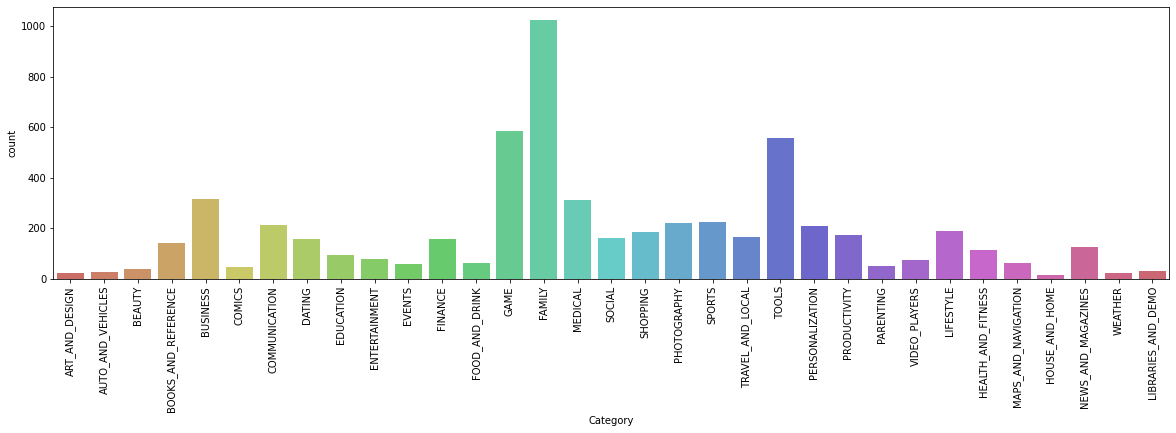

In [20]:
#barchart for different categories of apps
plt.figure(figsize=(20,5))
fig = sns.countplot(x=data['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
#it shows 'FAMILY' category apps are the most and 'HOUSE_AND_HOME' are least

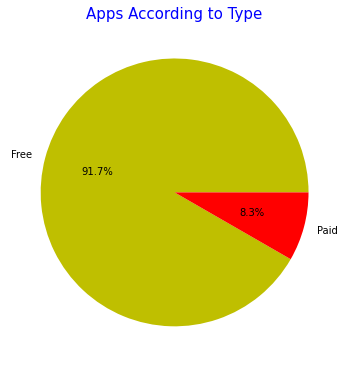

In [21]:
#pie chart for Free and Paid Apps
labels = data.Type.value_counts().index
colors = ["y","r"]
explode = [0,0]
sizes = data.Type.value_counts().values

# visual 
plt.figure(0,figsize = (6,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Type',color = 'blue',fontsize = 15)
plt.show()




In [22]:
data['Content Rating'].value_counts()

Everyone           4861
Teen                684
Mature 17+          301
Everyone 10+        190
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

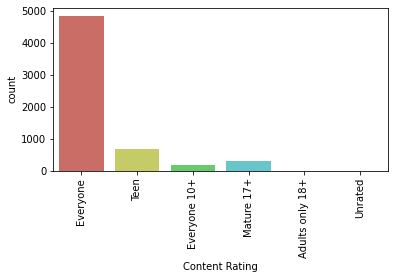

In [23]:
#Content Rating and Count
plt.figure(figsize=(6,3))
fig = sns.countplot(x=data['Content Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
#Everyone is the most Content Rating and least is 'Unrated and Adults only 18+'

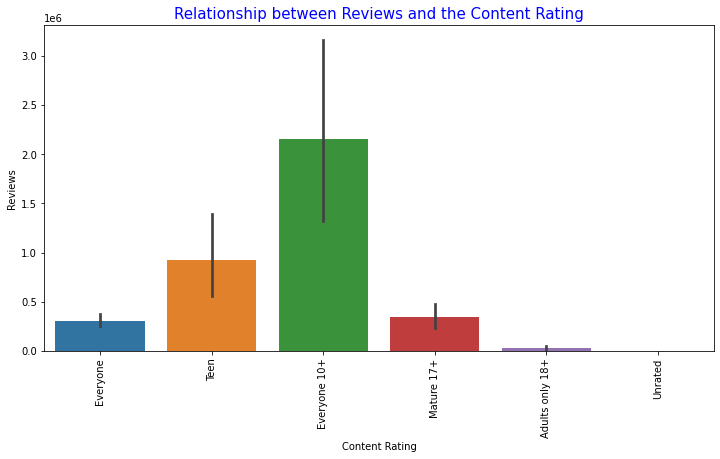

In [24]:
#Content Rating and Reviews
fig = plt.figure(figsize=(12,6))
plt.title('Relationship between Reviews and the Content Rating',color = 'blue',fontsize = 15)
fig = sns.barplot(x='Content Rating',y='Reviews',data=data)
fig = fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
#We observe Content Rating is most in 'Everyone 10+' and least in 'Adults only 18+' 

In [25]:
g_Rating = data.groupby('Rating').count()['Category']
g_Rating

Rating
1.0     24
1.2      4
1.4      1
1.5      5
1.6      5
1.7      6
1.8      7
1.9      9
2.0     12
2.1      1
2.2      8
2.3     16
2.4     13
2.5     21
2.6     23
2.7     24
2.8     35
2.9     23
3.0     61
3.1     63
3.2     41
3.3     73
3.4    102
3.5     98
3.6     79
3.7    166
3.8    184
3.9    229
4.0    365
4.1    423
4.2    497
4.3    605
4.4    631
4.5    610
4.6    456
4.7    341
4.8    178
4.9     87
5.0    394
Name: Category, dtype: int64

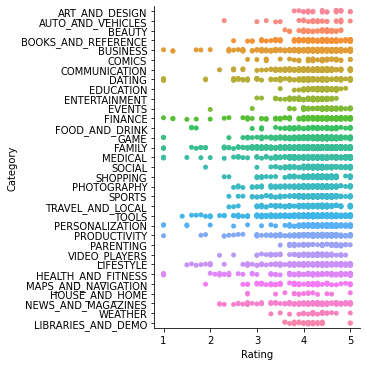

In [26]:
#Scatter Plot for Category and Rating - category plot in Seaborn
fig = sns.catplot(x="Rating",y="Category", data=data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


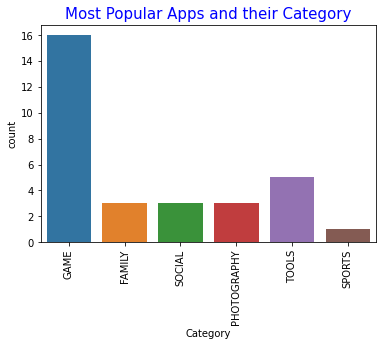

In [27]:
#Most Popular Apps based on Ratings and Reviews
most_popular_apps = data[(data["Reviews"]>10000000) ][ (data["Rating"]>=4.5)]
plt.title('Most Popular Apps and their Category',color = 'blue',fontsize = 15)
sns.countplot(x=most_popular_apps["Category"])
plt.xticks(rotation=90)
plt.show()

In [28]:
g_type = data.groupby('Type').count()['Reviews']
g_type

Type
Free    5539
Paid     502
Name: Reviews, dtype: int64

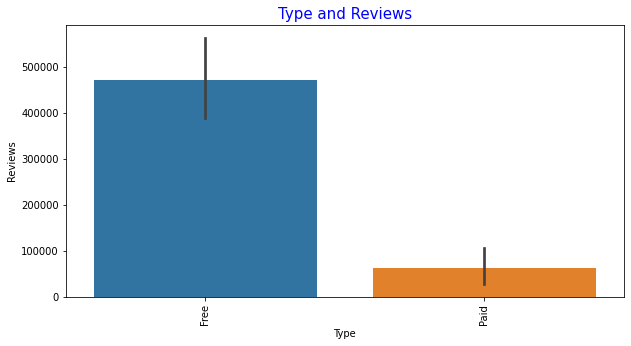

In [30]:
#Types of Apps and Reviews
fig = plt.figure(figsize=(10,5))
plt.title('Type and Reviews',color = 'blue',fontsize = 15)
fig = sns.barplot(x='Type',y='Reviews',data=data)
fig = fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

- **Plotly requires custom initialization.So,we have to write this function and call it whenever we use interactive python in 'Plotly'**

In [33]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [34]:
# interactive Histogram plot for the average Rating of All the apps in the play store

import plotly
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = [go.Histogram(
        x = data.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(data['Rating']))
configure_plotly_browser_state()
plotly.offline.iplot(df, filename='overall_rating_distribution')

Average app rating =  4.192103956298632


In [35]:
#Boxplot for Top 5 Categories with the most number of Apps
df=pd.DataFrame(data)
print(df.Category.value_counts().sort_values(ascending=False).nlargest(5))

df_family = df[df.Category=='FAMILY']
df_game = df[df.Category=='GAME']
df_tools = df[df.Category=='TOOLS']
df_business = df[df.Category=='BUSINESS']
df_medical = df[df.Category=='MEDICAL']

box1 = go.Box(
                y= df_family.Rating,
                name= 'Family',
                marker = dict(color = 'rgb(12, 128, 128)'))
box2 = go.Box(
                y= df_game.Rating,
                name= 'Game',
                marker = dict(color = 'rgb(100, 12, 38)'))
box3 = go.Box(
                y= df_tools.Rating,
                name= 'Tools',
                marker = dict(color = 'rgb(12, 128, 128)'))
box4 = go.Box(
                y= df_business.Rating,
                name= 'Business',
                marker = dict(color = 'rgb(50, 40, 100)'))
box5 = go.Box(
                y= df_medical.Rating,
                name= 'Medical',
                marker = dict(color = 'rgb(45, 179, 66)'))

data_boxes = [box1,box2,box3,box4,box5]
configure_plotly_browser_state()
iplot(data_boxes)



FAMILY      1025
GAME         587
TOOLS        557
BUSINESS     315
MEDICAL      314
Name: Category, dtype: int64


#Normalization
- we normalize data to bring all the variables to the same range(common scale)

In [36]:
np.mean(data.loc[:,['Rating']]) #mean of Rating column

Rating    4.192104
dtype: float64

In [37]:
np.var(data.loc[:,['Rating']]) #variance of Rating column

Rating    0.349762
dtype: float64

In [38]:
np.mean(data.loc[:,['Reviews']]) #mean of Reviews column

Reviews    437314.960828
dtype: float64

In [39]:
np.var(data.loc[:,['Reviews']]) #variance of Reviews column

Reviews    9.305531e+12
dtype: float64

In [40]:
#coverting to numpy array
from sklearn import preprocessing
x = data[["Rating"]].values
x

array([[4.1],
       [3.9],
       [4.7],
       ...,
       [4. ],
       [4. ],
       [4. ]])

In [41]:
#normalization of rating column
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_rating = pd.DataFrame(x_scaled)
df_rating

,0
0,0.775
1,0.725
2,0.925
3,0.875
4,0.700
...,...
6036,0.575
6037,0.575
6038,0.750
6039,0.750


In [42]:
#minimum of rating after normalization
df_rating.min()

0    0.0
dtype: float64

In [43]:
#maximum of rating after normalization
df_rating.max()

0    1.0
dtype: float64

In [44]:
#mean of rating
np.mean(df_rating)

0    0.798026
dtype: float64

In [45]:
#variance of rating
np.var(df_rating)

0    0.02186
dtype: float64

In [46]:
#coverting to numpy array
x = data[["Reviews"]].values
x

array([[1.590e+02],
       [9.670e+02],
       [8.751e+04],
       ...,
       [7.000e+00],
       [0.000e+00],
       [3.000e+00]])

In [47]:
#normalization of review column
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_review = pd.DataFrame(x_scaled)
df_review

,0
0,2.034333e-06
1,1.237233e-05
2,1.119651e-03
3,2.759067e-03
4,5.595246e-03
...,...
6036,8.956182e-08
6037,4.861927e-07
6038,8.956182e-08
6039,0.000000e+00


In [48]:
#minimum of review after normalization
df_review.min()

0    0.0
dtype: float64

In [49]:
#maximum of review after normalization
df_review.max()

0    1.0
dtype: float64

In [50]:
#mean of review
np.mean(df_review)

0    0.005595
dtype: float64

In [51]:
#variance of review
np.var(df_review)

0    0.001523
dtype: float64

#Standardization
-  We perform this after normalization. Data standardization is about making sure that data is internally consistent and each data type has the same content and format [Mean=0,Variance=1]

In [52]:
#fitting the data with new mean and standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[["Rating","Reviews"]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
#standardization of Rating column
from sklearn import preprocessing
rating = data.loc[:,["Rating"]]
x = rating.values.astype(float)
x_scaled_rating = preprocessing.scale(x)
x_scaled_rating

array([[-0.15573702],
       [-0.49391363],
       [ 0.85879282],
       ...,
       [-0.32482533],
       [-0.32482533],
       [-0.32482533]])

In [54]:
#mean when rating is standardized which is 0
x_scaled_rating.mean(axis=0)

array([-6.39853084e-16])

In [55]:
#variance when rating is standardized which is 1
x_scaled_rating.var(axis=0)

array([1.])

In [56]:
#standardization of Reviews column
review = data.loc[:,["Reviews"]]
x = review.values.astype(float)
x_scaled_review = preprocessing.scale(x)
x_scaled_review

array([[-0.14330648],
       [-0.1430416 ],
       [-0.11467147],
       ...,
       [-0.14335631],
       [-0.1433586 ],
       [-0.14335762]])

In [57]:
#mean when reviews is standardized which is 0
x_scaled_review.mean(axis=0)

array([0.])

In [58]:
#variance when reviews is standardized which is 1
x_scaled_review.var(axis=0)

array([1.])

In [59]:

#The DataFrame after standardization of numeric columns
import pandas as pd
standard = data.loc[:,["Rating","Reviews"]]
x = standard.values.astype(float)
x_scaled = preprocessing.scale(data[["Rating","Reviews"]])
standardized = pd.DataFrame(x_scaled)
standardized

,0,1
0,-0.155737,-0.143306
1,-0.493914,-0.143042
2,0.858793,-0.114671
3,0.520616,-0.072667
4,-0.663002,0.000000
...,...,...
6036,-1.508443,-0.143356
6037,-1.508443,-0.143346
6038,-0.324825,-0.143356
6039,-0.324825,-0.143359


In [60]:
#normality check using normal probabilty plot
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
def normality_check(data):
    pos = []
    th_Q = []
    data = np.sort(np.array(data))
    pos = [(i-0.5)/len(data) for i in range(1,len(data)+1)]
    th_Q = [norm.ppf(i, np.mean(data), np.std(data,ddof = 1)) for i in pos]
    plt.plot(data,th_Q,'ro',data,data)
    plt.show()

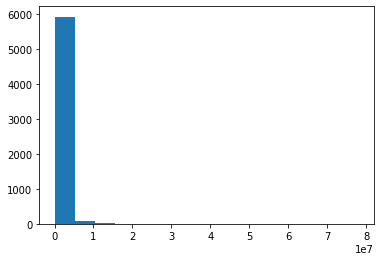

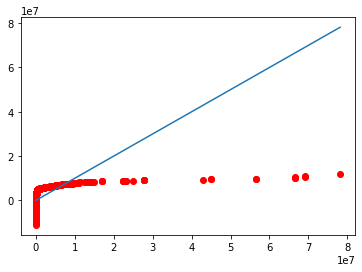

In [61]:
plt.hist(data.Reviews,bins = 15)
plt.show()
normality_check(data.Reviews)

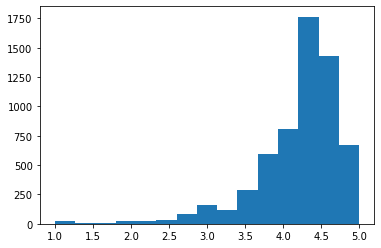

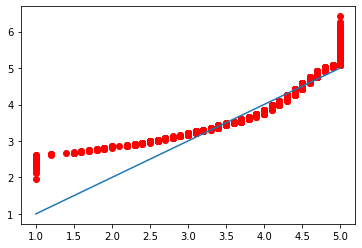

In [62]:
#normality check using histogram and normal probability plot for rating column
plt.hist(data.Rating,bins = 15)
plt.show()
normality_check(data.Rating)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



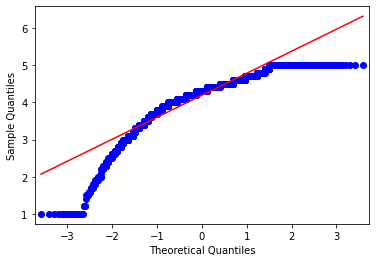

In [63]:
#normality check using qq plot for rating column
import numpy as np
import statsmodels.api as sm
import pylab as py
sm.qqplot(data["Rating"],line='s')
py.show()

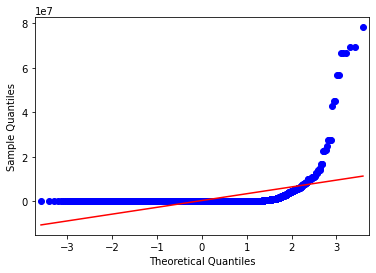

In [64]:
#normality check using qq plot for reviews column
sm.qqplot(data["Reviews"],line='s')
py.show()

#Hypothesis Testing

In [67]:
#Two-sided-hypothesis
from scipy.stats import norm
from math import sqrt


def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = 585
pop_mean = 558
sample_size =  100
std_dev = 139

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 558
H1 : μ != 558
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 1.9424460431654675 

Failed to reject NULL hypothesis


In [68]:
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = 108
pop_mean = 100
sample_size =  36
std_dev = 15

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 100
H1 : μ > 100
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 3.2 

Reject NULL hypothesis


#Correlation

In [69]:
#finding the correlation
data.loc[data['Size'] == 'Varies with device'].shape
unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
res = data.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+',''))


#Converting Installs column to numerics
data['Installs'] = pd.to_numeric(data['Installs'],errors='coerce')
res = data.groupby('Category')['Installs'].sum().reset_index()
finaldata = res.sort_values('Installs', ascending=False).reset_index(drop=True)

data['Type'] = data['Type'].apply(lambda x: str(x).replace('Free','0'))
data['Type'] = data['Type'].apply(lambda x: str(x).replace('Paid','1'))


#Converting Type column to numerics
data['Type'] = pd.to_numeric(data['Type'],errors='coerce')
res = data.groupby('Category')['Type'].sum().reset_index()
finaldata = res.sort_values('Type', ascending=False).reset_index(drop=True)


#Converting Size column to numerics
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$',''))
data['Price'] = pd.to_numeric(data['Price'],errors='coerce')
res = data.groupby('Category')['Price'].sum().reset_index()
finaldata = res.sort_values('Price', ascending=False).reset_index(drop=True)

data.corr()

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.059991,-0.006389,-0.062468,0.028904,0.014236
Reviews,0.059991,1.000000,0.029689,0.041245,-0.034733,-0.009882
Size,-0.006389,0.029689,1.000000,-0.030876,0.061134,0.002818
Installs,-0.062468,0.041245,-0.030876,1.000000,-0.078182,-0.054626
Type,0.028904,-0.034733,0.061134,-0.078182,1.000000,0.242957
Price,0.014236,-0.009882,0.002818,-0.054626,0.242957,1.000000


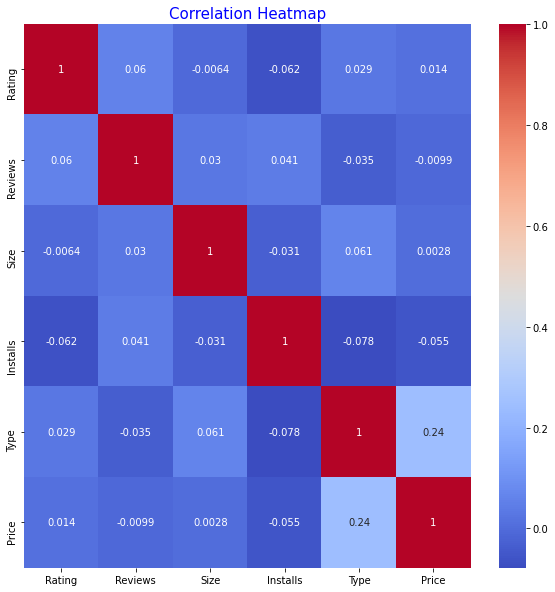

In [70]:
#correlation using heatmap 
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap',color = 'blue',fontsize = 15)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

#Data Insights
-  The highest number of apps fall under 'Family category'. 
- The least number of apps fall under 'HOUSE_AND_HOME'. 
- Free Apps dominate the Google Play store with 91.7% .
- There are greater number of apps made for teens. 
- In the bar plot of 'Content Rating Vs Reviews','Everyone with 10+' has most reviews and least is 'Only adults 18+' - Earlier we observed that “Everyone” had more app counts but it doesn’t contribute significantly to number of reviews.
- Family has the highest number of ratings than any other category. But for more consistency, we take a greater number of reviews [10000000] and a very good rating of more than 4.5 points. Surprisingly enough, it is the 'games' category that is the most popular and has a median rating of 4.4 observed from the box plot.
- The large number of reviews are for Free Apps. Paid apps need subscriptions and hence a smaller number of reviews. The average rating of all the play store app is found to be close to 4.19. 
